In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

In [3]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


In [4]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

In [6]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [7]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1356/1875 [====================>.........] - ETA: 10s - loss: 0.2255 - accuracy: 0.9334

KeyboardInterrupt: 

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

In [ ]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

In [ ]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

In [ ]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

In [ ]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=32
n_channel_2=64
n_dense=64
n_train_epoch=5

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

# 가위바위보 분류기를 만들어보자

In [1]:
import tensorflow as tf
import numpy as np
import os
from os.path import join
from PIL import Image
import glob
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

print(tf.__version__)
print(np.__version__)

2.6.0
1.22.2


In [2]:
rock_dir = os.getenv('HOME')+'/aiffel/rock_scissor_paper/rock'
#paper_dir = os.getenv('HOME')+'/aiffel/rock_scissor_paper/paper'
#scissor_dir = os.getenv('HOME')+'/aiffel/rock_scissor_paper/scissor'

img_name = ('0.jpg')
ex_file = join(rock_dir, img_name)

im = Image.open(ex_file)
im.size

(28, 28)

In [3]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

# 바위위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paer"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
0  images to be resized.
0  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [4]:
def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)

train_scaled, val_scaled, train_target, val_target = train_test_split(
    x_train, y_train, test_size = 0.2, random_state = 42)

x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  2


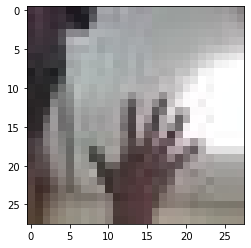

In [5]:
plt.imshow(train_scaled[0])
print('라벨: ', train_target[0])

In [6]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=32
n_channel_2=64
n_dense=64
n_train_epoch = 20

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0

Epoch 1/20
8/8 [==============================] - 1s 66ms/step - loss: 18.4435 - accuracy: 0.3958 - val_loss: 3.4299 - val_accuracy: 0.2667
Epoch 2/20
8/8 [==============================] - 0s 45ms/step - loss: 3.5145 - accuracy: 0.3917 - val_loss: 1.0751 - val_accuracy: 0.3667
Epoch 3/20
8/8 [==============================] - 0s 43ms/step - loss: 1.1552 - accuracy: 0.5958 - val_loss: 0.4321 - val_accuracy: 0.8000
Epoch 4/20
8/8 [==============================] - 0s 42ms/step - loss: 0.5698 - accuracy: 0.6833 - val_loss: 0.2661 - val_accuracy: 1.0000
Epoch 5/20
8/8 [==============================] - 0s 42ms/step - loss: 0.4662 - accuracy: 0.8042 - val_loss: 0.2435 - val_accuracy: 1.0000
Epoch 6/20
8/8 [==============================] - 0s 39ms/step - loss: 0.3943 - accuracy: 0.8417 - val_loss: 0.2054 - val_accuracy: 0.9833
Epoch 7/20
8/8 [==============================] - 0s 43ms/step - loss: 0.3493 - accuracy: 0.8500 - val_loss: 0.1019 - val_accuracy: 1.0000
Epoch 8/20
8/8 [==========

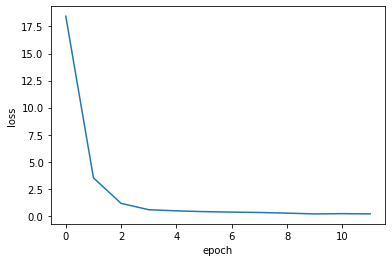

In [7]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics='accuracy')

early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)
history = model.fit(train_scaled, train_target, epochs = n_train_epoch,
          validation_data = (val_scaled, val_target),
          callbacks = [early_stopping_cb])

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 경문님껄로 테스트

In [8]:
rock_dir = os.getenv('HOME')+'/aiffel/rock_scissor_paper/test/rock'

img_name = ('0.jpg')
ex_file = join(rock_dir, img_name)

im = Image.open(ex_file)
im.size

(28, 28)

In [9]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

114  images to be resized.
114  images resized.
112  images to be resized.
112  images resized.
111  images to be resized.
111  images resized.


In [10]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path, number_of_data = 337)

x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 337 입니다.
x_test shape: (337, 28, 28, 3)
y_test shape: (337,)


라벨:  2


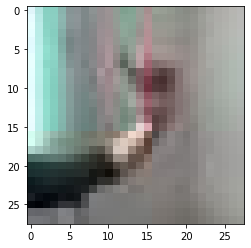

In [11]:
plt.imshow(x_test_norm[0])
print('라벨: ', train_target[0])

In [12]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

11/11 [==============================] - 0s 12ms/step - loss: 1.0981 - accuracy: 0.3294
test_loss: 1.0981141328811646 
test_accuracy: 0.32937684655189514


In [13]:
predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [0.33218694 0.3424918  0.3253213 ]
model이 추론한 가장 가능성이 높은 결과 :  1
실제 데이터의 라벨 :  0


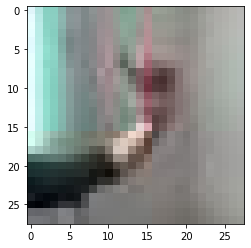

In [14]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [0.33200943 0.34264585 0.32534468]
라벨: 0, 예측결과: 1


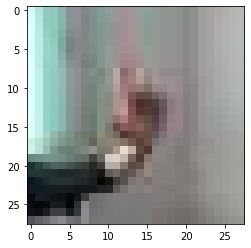

예측확률분포: [0.33152673 0.3421931  0.32628015]
라벨: 2, 예측결과: 1


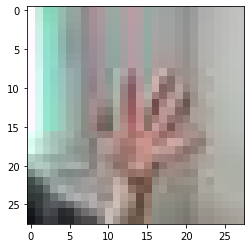

예측확률분포: [0.3300962  0.34300047 0.32690334]
라벨: 2, 예측결과: 1


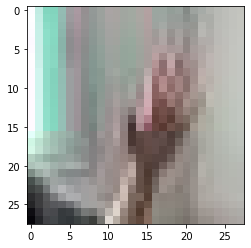

예측확률분포: [0.33564863 0.34165823 0.32269317]
라벨: 0, 예측결과: 1


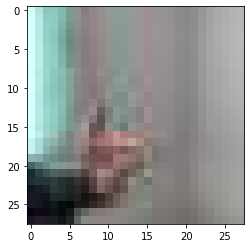

예측확률분포: [0.3356121  0.34216538 0.32222253]
라벨: 0, 예측결과: 1


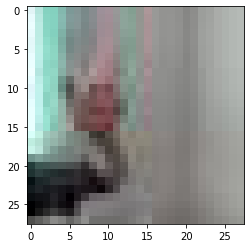

In [15]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

# 오연님껄로 테스트

In [16]:
# 디렉토리 만들기
! mkdir -p ~/aiffel/rock_scissor_paper/test_ooo

! mkdir -p ~/aiffel/rock_scissor_paper/test_ooo/scissor
! mkdir -p ~/aiffel/rock_scissor_paper/test_ooo/rock
! mkdir -p ~/aiffel/rock_scissor_paper/test_ooo/paper

! ls -l ~/aiffel/rock_scissor_paper/test_ooo

total 12
drwxr-xr-x 2 root root 4096 May 14 04:15 paper
drwxr-xr-x 2 root root 4096 May 14 04:15 rock
drwxr-xr-x 3 root root 4096 May 14 04:15 scissor


In [17]:
import zipfile
with zipfile.ZipFile(os.getenv("HOME") + '/aiffel/rock_scissor_paper/test_ooo/rock/25_rock-samples.zip', 'r') as zip_ref:
    zip_ref.extractall(os.getenv("HOME") + '/aiffel/rock_scissor_paper/test_ooo/rock/')

In [18]:
import zipfile
with zipfile.ZipFile(os.getenv("HOME") + '/aiffel/rock_scissor_paper/test_ooo/paper/25_paper-samples.zip', 'r') as zip_ref:
    zip_ref.extractall(os.getenv("HOME") + '/aiffel/rock_scissor_paper/test_ooo/paper/')

In [20]:
import zipfile
with zipfile.ZipFile(os.getenv("HOME") + '/aiffel/rock_scissor_paper/test_ooo/scissor/25_scissor-samples.zip', 'r') as zip_ref:
    zip_ref.extractall(os.getenv("HOME") + '/aiffel/rock_scissor_paper/test_ooo/scissor/')

In [21]:
rock_dir = os.getenv('HOME')+'/aiffel/rock_scissor_paper/test_ooo/rock'

img_name = ('0.jpg')
ex_file = join(rock_dir, img_name)

im = Image.open(ex_file)
im.size

(224, 224)

In [22]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test_ooo/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test_ooo/paper"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test_ooo/rock"
resize_images(image_dir_path)

102  images to be resized.
102  images resized.
104  images to be resized.
104  images resized.
110  images to be resized.
110  images resized.


In [24]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test_ooo"
(x_test, y_test)=load_data(image_dir_path, number_of_data = 316)

x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 316 입니다.
x_test shape: (316, 28, 28, 3)
y_test shape: (316,)


라벨:  2


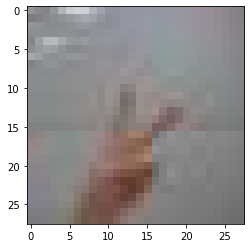

In [25]:
plt.imshow(x_test_norm[0])
print('라벨: ', train_target[0])

In [26]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 [==============================] - 0s 9ms/step - loss: 1.0990 - accuracy: 0.3481
test_loss: 1.0989665985107422 
test_accuracy: 0.34810125827789307


In [27]:
predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [0.33334118 0.34239277 0.32426602]
model이 추론한 가장 가능성이 높은 결과 :  1
실제 데이터의 라벨 :  0


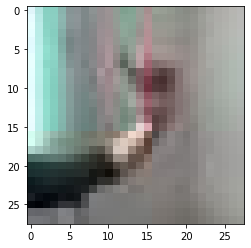

In [18]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [0.33325988 0.330156   0.33658406]
라벨: 1, 예측결과: 2


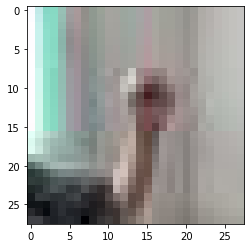

예측확률분포: [0.3310771  0.33097902 0.33794385]
라벨: 1, 예측결과: 2


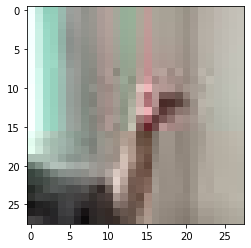

예측확률분포: [0.32999632 0.32938632 0.34061727]
라벨: 1, 예측결과: 2


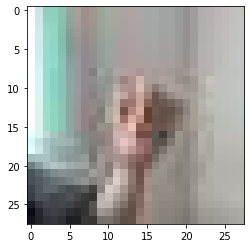

예측확률분포: [0.333523   0.32949504 0.33698195]
라벨: 0, 예측결과: 2


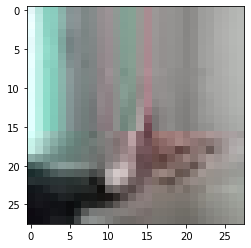

예측확률분포: [0.32988894 0.3304705  0.3396406 ]
라벨: 0, 예측결과: 2


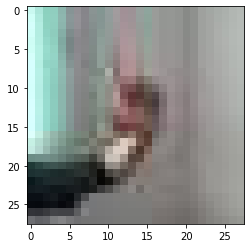

In [19]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()